In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "./data/mouse_drug_data.csv"
clinical_trial_data_to_load = "./data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_df=pd.read_csv(mouse_drug_data_to_load)
clinical_df=pd.read_csv(clinical_trial_data_to_load)







In [2]:
#clinical_df.drop_duplicates(subset=["Mouse ID","Timepoint","Tumor Volume (mm3)"])
clinical_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [3]:
mouse_drug_df.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [4]:
# Combine the data into a single dataset
experiment_df=pd.merge(clinical_df,mouse_drug_df,how="inner",on="Mouse ID")


# Display the data table for preview
#experiment_df.loc[experiment_df["Mouse ID"]=="f234"]
experiment_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [5]:
#experiment_df.drop_duplicates(subset=["Mouse ID","Timepoint","Tumor Volume (mm3)"])

## Tumor Response to Treatment

In [6]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_volume_mean=experiment_df.groupby(["Drug","Timepoint"], as_index=False)["Tumor Volume (mm3)"].mean()
tumor_volume_mean
# Convert to DataFrame
tumor_volume_mean_df=pd.DataFrame(tumor_volume_mean)
# Preview DataFrame
tumor_volume_mean_df.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [7]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

# Convert to DataFrame

# Preview DataFrame

In [8]:
tumor_volume_ste=experiment_df.groupby(["Drug","Timepoint"], as_index=False)
tumor_volum_ste2=tumor_volume_ste["Tumor Volume (mm3)"].agg(stats.sem)
tumor_volum_ste_df=pd.DataFrame(tumor_volum_ste2)
tumor_volum_ste_df.head()


#tumor_volume_ste=stats.sem(tumor_volume_std["Tumor Volume (mm3)"])

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [41]:
#df.groupby([df.index, 'key'])['val'].first().unstack()
hello3=tumor_volume_mean_df.groupby(["Timepoint","Drug"])["Tumor Volume (mm3)"].first().unstack()
hello3

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [9]:
#df.pivot(index=df.index, columns='key')['val']
tumor_volum_mean_pivot=tumor_volume_mean_df.pivot(index="Timepoint",columns="Drug",values="Tumor Volume (mm3)")
tumor_volum_ste_pivot=tumor_volum_ste_df.pivot(index="Timepoint",columns="Drug",values="Tumor Volume (mm3)")
tumor_volum_mean_pivot.head()
tumor_volum_ste_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


In [11]:
#df.pivot_table(values='val', index=df.index, columns='key', aggfunc='first')
hello2=tumor_volume_mean_df.pivot_table(index="Timepoint",columns="Drug",values="Tumor Volume (mm3)")
hello2

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [ ]:
# Minor Data Munging to c

# Preview that Reformatting worked

Int64Index([0, 5, 10, 15, 20, 25, 30, 35, 40, 45], dtype='int64', name='Timepoint')

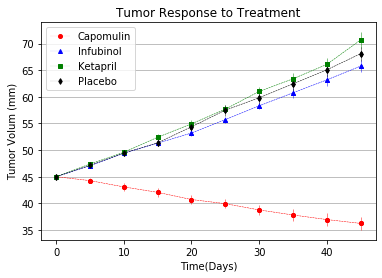

In [10]:
# Generate the Plot (with Error Bars)

# Save the Figure
# Setting up the plot
color_b=['red','blue','green','black']
marker_b=['o','^','s','d']
drug_b=["Capomulin","Infubinol","Ketapril","Placebo"]

for i in range(4):
    plt.plot(tumor_volum_mean_pivot.index,tumor_volum_mean_pivot[drug_b[i]],color=color_b[i], marker=marker_b[i],
             linestyle='--',linewidth=.1 , markersize=4,label=drug_b[i])
    plt.errorbar(tumor_volum_mean_pivot.index, tumor_volum_mean_pivot[drug_b[i]], tumor_volum_ste_pivot[drug_b[i]],
                 color=color_b[i],marker=marker_b[i],linestyle='--',alpha=10,markersize=4,linewidth=.5)

plt.legend()
plt.grid(b=True,axis="y")
plt.xlabel("Time(Days)")
plt.ylabel("Tumor Volum (mm)")
plt.title("Tumor Response to Treatment")


plt.show()

In [ ]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [11]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

metastatic_mean=experiment_df.groupby(["Drug","Timepoint"], as_index=True)["Metastatic Sites"].mean()

# Convert to DataFrame
metastatic_mean_df=pd.DataFrame(metastatic_mean)
# Preview DataFrame
metastatic_mean_df.head()


# Convert to DataFrame

# Preview DataFrame


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [12]:
metastatic_ste=experiment_df.groupby(["Drug","Timepoint"], as_index=True)
metastatic_ste2=metastatic_ste["Metastatic Sites"].agg(stats.sem)
metastatic_ste_df=pd.DataFrame(metastatic_ste2)
metastatic_ste_df.index

MultiIndex(levels=[['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'], [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]],
           codes=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]],
           names=['Drug', 'Timepoint'])

In [ ]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [13]:
metastatic_mean_pivot=metastatic_mean_df.pivot_table(index="Timepoint",columns="Drug",values="Metastatic Sites")
metastatic_ste_pivot=metastatic_ste_df.pivot_table(index="Timepoint",columns="Drug",values="Metastatic Sites")
metastatic_ste_pivot
metastatic_mean_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


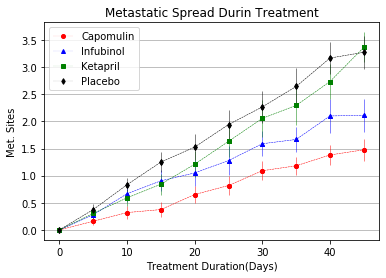

In [58]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure

color_b=['red','blue','green','black']
marker_b=['o','^','s','d']
drug_b=["Capomulin","Infubinol","Ketapril","Placebo"]

for i in range(4):
    plt.plot(metastatic_mean_pivot.index,metastatic_mean_pivot[drug_b[i]],color=color_b[i], marker=marker_b[i],
             linestyle='--',linewidth=.1 , markersize=4,label=drug_b[i])
    plt.errorbar(metastatic_mean_pivot.index, metastatic_mean_pivot[drug_b[i]], metastatic_ste_pivot[drug_b[i]],
                 color=color_b[i],marker=marker_b[i],linestyle='--',alpha=10,markersize=4,linewidth=.5)

plt.legend()
plt.grid(b=True,axis="y")
plt.xlabel("Treatment Duration(Days)")
plt.ylabel("Met. Sites")
plt.title("Metastatic Spread Durin Treatment")

plt.show()



![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [ ]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


In [14]:
#Mouse ID
mouse_count=experiment_df.groupby(["Drug","Timepoint"], as_index=False)["Mouse ID"].count()

mouse_count.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [15]:
mouse_count_pivot=mouse_count.pivot_table(index="Timepoint",columns="Drug",values="Mouse ID")
mouse_count_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


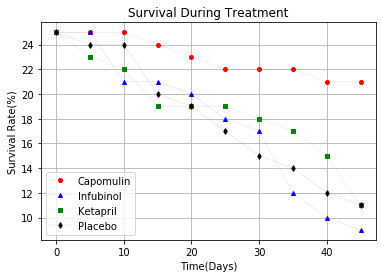

In [59]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
color_b=['red','blue','green','black']
marker_b=['o','^','s','d']
drug_b=["Capomulin","Infubinol","Ketapril","Placebo"]

for i in range(4):
    plt.plot(mouse_count_pivot.index,mouse_count_pivot[drug_b[i]],color=color_b[i], marker=marker_b[i],
             linestyle='--',linewidth=.1 , markersize=4,label=drug_b[i])
    

plt.legend()
plt.grid(b=True,axis="both")
plt.xlabel("Time(Days)")
plt.ylabel("Survival Rate(%)")
plt.title("Survival During Treatment")

plt.show()


![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [16]:
c=tumor_volum_mean_pivot.iloc[0,:]
d=tumor_volum_mean_pivot.iloc[-1,:]

chnages_percent=(d-c)/c*100
chnages_percent




Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

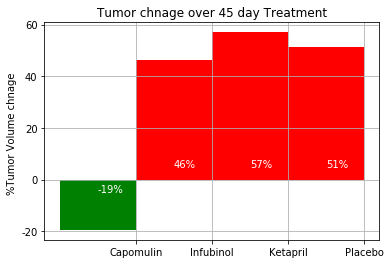

In [56]:
# Store all Relevant Percent Changes into a Tuple
drug_b=["Capomulin","Infubinol","Ketapril","Placebo"]
chnage_specifix=list(chnages_percent[drug_b])

# Splice the data between passing and failing drugs
color_c =["red" if i >0 else "green" for i in chnage_specifix  ]

# Orient widths. Add labels, tick marks, etc.
plt.title("Tumor chnage over 45 day Treatment")
plt.ylabel("%Tumor Volume chnage ")
plt.xticks(ticks=[.5,1.5,2.5,3.5],labels=drug_b)
plt.yticks(ticks=[-20,0,20,40,60],labels=[-20,0,20,40,60])

# Use functions to label the percentages of changes
x=[0,1,2,3]

for a,b in zip(x, chnage_specifix): 
    plt.text(a, 5 if b >0 else -5  , str(round(b))+"%",color="w")


# Call functions to implement the function calls
plt.bar([0,1,2,3],chnage_specifix,width=1,color=color_c)
#plt.yscale()

plt.grid()

# Save the Figure

plt.show()




![Metastatic Spread During Treatment](../Images/change.png)